In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
import torch
import torchvision

In [9]:
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01

In [10]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

In [11]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

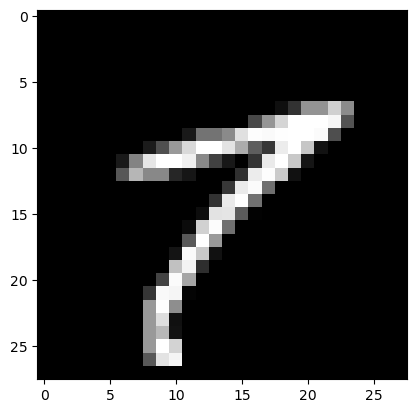

In [18]:
plt.figure()
plt.imshow(example_data[0,0], cmap='gray')

In [143]:
example_targets[0]

tensor(7)

In [110]:
layer1 = torch.zeros(len(example_data[0,0].flatten()))
layer2 = torch.zeros(10)
weights = torch.rand(len(layer1),len(layer2))
bias = torch.rand(len(layer2))


In [153]:
forward = lambda x, weights, bias : torch.matmul(x,weights) + bias
softmax = lambda x : torch.exp(x)/torch.sum(torch.exp(x))

In [157]:
result = -torch.log(softmax(forward(example_data[0,0].flatten(),weights,bias)))
y_train = torch.zeros(10)
y_train[example_targets[0]] =1

In [160]:
result[example_targets[0]]

tensor(15.6546)

In [161]:
result

tensor([1.2420e+01, 1.4085e+01, 1.4837e+01, 1.1457e+01, 5.1320e+00, 6.1849e-03,
        8.8199e+00, 1.5655e+01, 9.3463e+00, 1.1512e+01])

In [156]:
softmax(forward(example_data[0,0].flatten(),weights,bias))

tensor([4.0385e-06, 7.6406e-07, 3.5998e-07, 1.0573e-05, 5.9049e-03, 9.9383e-01,
        1.4777e-04, 1.5896e-07, 8.7288e-05, 1.0005e-05])

In [145]:
y_train = torch.zeros(10)
y_train[example_targets[0]] =1
y_train

tensor([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [50]:
def mean_squared_error(y_true, y_pred):
    """
    Calculate the Mean Squared Error (MSE) between two PyTorch tensors.

    Parameters:
    - y_true: A PyTorch tensor containing the true values.
    - y_pred: A PyTorch tensor containing the predicted values.

    Returns:
    - mse: The Mean Squared Error between the two tensors.
    """
    if y_true.size() != y_pred.size():
        raise ValueError("Input tensors must have the same shape")
    
    mse = torch.mean((y_true - y_pred) ** 2)
    
    return mse

# Example usage:
true_values = torch.tensor([1.0, 2.0, 3.0, 4.0, 5.0])
predicted_values = torch.tensor([1.1, 2.2, 2.8, 4.2, 4.9])

mse = mean_squared_error(true_values, predicted_values)
print("Mean Squared Error:", mse.item())  # Use .item() to get the scalar value from the tensor


Mean Squared Error: 0.027999991551041603
